# Insurance: 360-degree customer view
\[_In case you’re unable to see the atoti visualizations in GitHub, try viewing the notebook in [nbviewer](https://nbviewer.org/github/atoti/notebooks/blob/master/notebooks/customer360/03-main-csv.ipynb)._]

An insurance company can have multiple contractual relationship with a customer, considering that it has multiple solutions that caters to different risk needs of individuals and corporates.  

Having a customer-centric view of the relationships one has with the insurance company has many advantages, e.g.:
- knowing the customers and their behavior better
- Ability to deliver more personalized experience 
- optimized marketing effort to capitalize opportunities and retaining customers

Legacy systems pose as a challenge for insurance companies to achieve a single customer view.  
With [atoti](https://www.atoti.io/), we have created a simplified use case of how we can integrate data from different systems into a consolidated view for multidimensional data analytics for insurance industry.  

Mock data schema is being used for demonstrative purpose only.

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=customer360" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/discover.png" alt="Try atoti"></a></div>

In [1]:
from datetime import datetime

import atoti as tt
import pandas as pd

## Setting up multidimensional analysis 

In [2]:
session = tt.Session(
    user_content_storage="./content",
    port=9091,
)

### Consolidating policies information

Insurance company A has three different systems storing the below policies:
- Life Insurance
- Property
- Vehicles

We will simplify consolidate the key features of the policy details for these 3 types of policies into a single table in atoti.  
atoti is able to read data from different sources such as [CSV, Parquet, Pandas and Spark dataframes](https://www.atoti.io/features/) etc.  
Refer to [02-main-vertica.ipynb](02-main-vertica.ipynb) on how to create a cube from [Vertica database](https://www.vertica.com/).

In this notebook, we will use CSV files or Pandas dataframe as our data source.
These data will be held in-memory.

In [3]:
policy_tbl = session.read_csv(
    "s3://data.atoti.io/notebooks/customer360/Policy_property.csv",
    table_name="policy",
    keys=["CUST_ID", "POLICY"],
)

In [4]:
len(policy_tbl)

136665

#### Incremental dataloading from different type of data source

atoti supports incremental data loading. As an example, we will combine the remaining policies into a single Pandas dataframe and load it into the existing `policy` table.

In [5]:
other_policies = pd.read_csv(
    "https://data.atoti.io/notebooks/customer360/Policy_life.csv"
)

vehicle_policies = pd.read_csv(
    "https://data.atoti.io/notebooks/customer360/Policy_vehicle.csv"
)

other_policies = pd.concat([other_policies, vehicle_policies])
print(len(other_policies))
other_policies.head()

19994


,CUST_ID,POLICY,POLICY_STATUS,POLICY_TYPE,QUOTE_DATE,COVER_START,LAPSED_DATE,CANCELLED_DATE,MATURITY_DATE,PAYMENT_METHOD,PAYMENT_FREQUENCY,SUM_INSURED,OWNERSHIP,PLAN_TYPE,BASIC_PREMIUM,NUM_SUBPOLICY,IS_SUB
0,C00000014,L001760,Live,Life insurance,1998-10-29,1998-10-31,NaN,NaN,2032-02-01,NonDD,Annual,1000000.0,NaN,B,903.0,0,N
1,C00000016,L011916,Live,Life insurance,2004-05-17,2004-05-31,NaN,NaN,2036-06-16,DD-Other,Annual,1000000.0,NaN,B,903.0,0,N
2,C00000032,L013466,Live,Life insurance,2004-12-20,2004-12-25,NaN,NaN,2048-07-28,PureDD,Annual,1000000.0,NaN,B,903.0,0,N
3,C00000034,L061496,Live,Life insurance,2018-10-03,2018-10-05,NaN,NaN,2062-10-01,PureDD,Annual,1000000.0,NaN,B,903.0,0,N
4,C00000044,L000030,Live,Life insurance,1993-10-30,1993-11-17,NaN,NaN,2045-04-13,PureDD,Annual,1000000.0,NaN,B,903.0,0,N


We need to ensure that the numerical columns and date columns are of the correct data type before loading them into the atoti table.  
The following cell is how we can see the data type of the columns.

In [6]:
policy_tbl

Table(_name='policy', _scenario='Base', _columns={'CUST_ID': Column(name='CUST_ID', data_type=DataType(java_type='string', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'POLICY': Column(name='POLICY', data_type=DataType(java_type='string', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'POLICY_STATUS': Column(name='POLICY_STATUS', data_type=DataType(java_type='string', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'POLICY_TYPE': Column(name='POLICY_TYPE', data_type=DataType(java_type='string', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'QUOTE_DATE': Column(name='QUOTE_DATE', data_type=DataType(java_type='LocalDate', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'COVER_START': Column(name='COVER_START', data_type=DataType(java_type='LocalDate', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'LAPSED_DATE': Column(name='LAPSED_DATE', data_type=DataType(java_type='LocalDate', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'CANCELLED_DATE': Column(name='CANCELLED_DATE', data_type=DataType(java_type='LocalDate', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'MATURITY_DATE': Column(name='MATURITY_DATE', data_type=DataType(java_type='LocalDate', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'PAYMENT_METHOD': Column(name='PAYMENT_METHOD', data_type=DataType(java_type='string', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'PAYMENT_FREQUENCY': Column(name='PAYMENT_FREQUENCY', data_type=DataType(java_type='string', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'SUM_INSURED': Column(name='SUM_INSURED', data_type=DataType(java_type='double', nullable=True), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'OWNERSHIP': Column(name='OWNERSHIP', data_type=DataType(java_type='string', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'PLAN_TYPE': Column(name='PLAN_TYPE', data_type=DataType(java_type='string', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'BASIC_PREMIUM': Column(name='BASIC_PREMIUM', data_type=DataType(java_type='double', nullable=True), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'NUM_SUBPOLICY': Column(name='NUM_SUBPOLICY', data_type=DataType(java_type='double', nullable=True), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>), 'IS_SUB': Column(name='IS_SUB', data_type=DataType(java_type='string', nullable=False), _table_name='policy', _table_identity=('policy', 'Base'), _java_api=<atoti._java_api.JavaApi object at 0x000001E2497CB0D0>)})

We can cast the columns to the respective data type of the atoti table.

In [7]:
other_policies["QUOTE_DATE"] = pd.to_datetime(other_policies["QUOTE_DATE"])
other_policies["COVER_START"] = pd.to_datetime(other_policies["COVER_START"])
other_policies["LAPSED_DATE"] = pd.to_datetime(other_policies["LAPSED_DATE"])
other_policies["CANCELLED_DATE"] = pd.to_datetime(other_policies["CANCELLED_DATE"])
other_policies["MATURITY_DATE"] = pd.to_datetime(other_policies["MATURITY_DATE"])

other_policies.dtypes

CUST_ID                      object
POLICY                       object
POLICY_STATUS                object
POLICY_TYPE                  object
QUOTE_DATE           datetime64[ns]
COVER_START          datetime64[ns]
LAPSED_DATE          datetime64[ns]
CANCELLED_DATE       datetime64[ns]
MATURITY_DATE        datetime64[ns]
PAYMENT_METHOD               object
PAYMENT_FREQUENCY            object
SUM_INSURED                 float64
OWNERSHIP                    object
PLAN_TYPE                    object
BASIC_PREMIUM               float64
NUM_SUBPOLICY                 int64
IS_SUB                       object
dtype: object

In the initial loading, we used the `read_*` function to initial the table. For incremental loading, we will use the `load_*` function from the table variable - `policy_tbl`.

In [8]:
policy_tbl.load_pandas(other_policies)

In [9]:
len(policy_tbl)

156659

In [10]:
policy_tbl.head()

,,POLICY_STATUS,POLICY_TYPE,QUOTE_DATE,COVER_START,LAPSED_DATE,CANCELLED_DATE,MATURITY_DATE,PAYMENT_METHOD,PAYMENT_FREQUENCY,SUM_INSURED,OWNERSHIP,PLAN_TYPE,BASIC_PREMIUM,NUM_SUBPOLICY,IS_SUB
CUST_ID,POLICY,,,,,,,,,,,,,,,
C00038618,P222706,Lapsed,Property,2007-12-31,2008-01-03,2014-02-07,N/A,2038-01-03,NonDD,3 Years,230000.0,Tenant,A,150.09,2.0,N
C00062947,P088041,Lapsed,Property,2010-02-05,2010-02-23,2018-10-09,N/A,2040-02-23,NonDD,3 Years,105000.0,Homeowner,B,293.32,2.0,N
C00000001,P215352,Live,Property,2002-12-31,2003-01-14,N/A,N/A,2033-01-14,PureDD,Annual,240000.0,Homeowner,A,58.86,1.0,N
C00062948,P000733,Live,Property,2007-11-05,2007-11-11,N/A,N/A,2037-11-11,PureDD,3 Years,85000.0,Tenant,A,150.09,NaN,N
C00038618,P233226,Live,Property,1997-12-05,1997-12-25,N/A,N/A,2027-12-25,PureDD,3 Years,225000.0,Landlord,B,293.32,NaN,N


#### Additional coverage 

Some property policies may have added optional coverage by topping up the premiums. The add-ons has its own insured sum.  
In the case of "Family personal accident" add-on for instance, it covers the spouse and up to 3 children.

We will add these subpolicies into the main policy table with the `IS_SUB` indicator set to `Y`, so that the sub-policy holders will be able to see their policies.

In [11]:
policy_tbl.load_csv("s3://data.atoti.io/notebooks/customer360/Sub_Policy.csv")

We will also create a table for the additional coverage, so that we can see the sub-policies related to the main policies.

In [12]:
addons_tbl = session.read_csv(
    "s3://data.atoti.io/notebooks/customer360/additional_coverage.csv",
    table_name="additional_coverage",
    keys=["POLICY", "SUB_POLICY"],
)

addons_tbl.head()

ADD_SUM_INSURED         ADD_COVERAGE_TYPE  PREMIUM  \
POLICY  SUB_POLICY                                                        
P105759 PL00023585          500000.0        Personal liability    76.50   
P105761 FPA00056695          50000.0  Family personal accident    62.50   
        PL00034951          500000.0        Personal liability    30.00   
P105764 FPA00030435          50000.0  Family personal accident   159.38   
        FPA00030436          50000.0  Family personal accident      NaN   

                    RELATION    INSURED  
POLICY  SUB_POLICY                       
P105759 PL00023585   Insured  C00102459  
P105761 FPA00056695  Insured  C00099437  
        PL00034951   Insured  C00099437  
P105764 FPA00030435  Insured  C00051377  
        FPA00030436   Spouse  C00092104

In [13]:
policy_tbl.join(addons_tbl)

#### Adding policy coverage information

Just to demonstrate how we can integrate details of policy, we will include the coverage of the property policies into the cube.

In [14]:
coverage_tbl = session.read_csv(
    "s3://data.atoti.io/notebooks/customer360/coverage.csv",
    table_name="coverage",
    keys=["POLICY", "COVERAGE_TYPE"],
)

coverage_tbl.head()

SUM_INSURED
POLICY  COVERAGE_TYPE                  
P000001 Contents                  35000
        Personal Liability       500000
P000002 Contents                  25000
        Personal Liability       500000
        Renovation                50000

We can now join the coverage table to the policy table.

In [15]:
policy_tbl.join(coverage_tbl)

### Creating a cube with policy views

Now that we have joined all the tables pertaining to the policies, we can now create a cube and look at the schema.

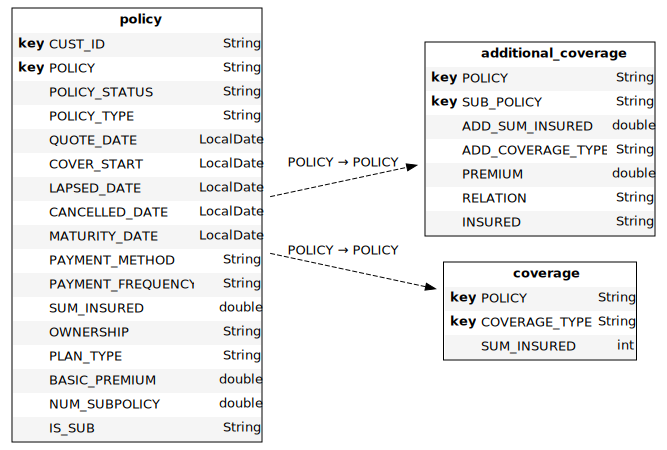

In [16]:
cube = session.create_cube(policy_tbl, "Insurance")
cube.schema

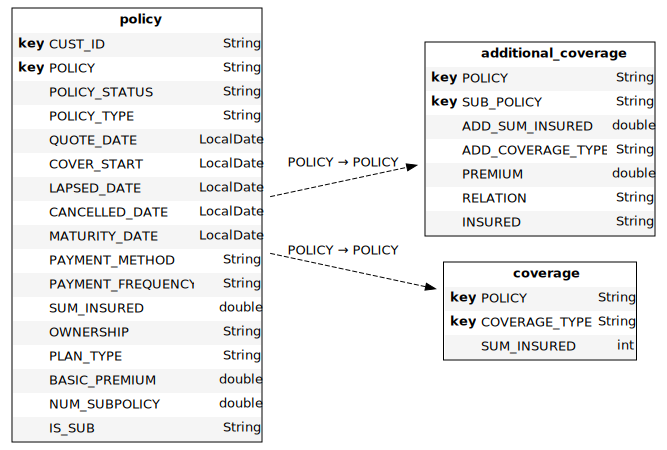

In [17]:
cube.schema

We will be able start creating visualizations based on the data schema that we have.  
The below pivot table allows us to have a quick view on the status of the policies that each customer has.

In [18]:
session.visualize("Policy overview by customers")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Enriching cube with customer table

Finally, we can enrich the cube with client information:

In [19]:
customer_tbl = session.read_csv(
    "s3://data.atoti.io/notebooks/customer360/customer.csv",
    table_name="customer",
    keys=["CUST_ID", "AGE"],
)

In [20]:
customer_tbl.head()

,,DOB,EMPLOYMENT_STATUS,MARITAL_STATUS,GENDER,STATE,CITY,INCOME,EDUCATION
CUST_ID,AGE,,,,,,,,
C00000001,36,1985-03-08,Freelancer,Other,Male,VIC,Melbourne,"10,000 - 24,999",Primary
C00000002,48,1972-12-05,Self-employed,Other,Male,VIC,Melbourne,0,Below primary level
C00000003,25,1996-06-03,Employed,Single,Male,VIC,Melbourne,"1 - 9,999",Master's Degree
C00000004,40,1980-11-11,Employed,Domestic partner,Female,QLD,Brisbane,"50,000 - 74,999",Upper Secondary
C00000005,59,1962-10-17,Retired,Other,Female,QLD,Brisbane,"1 - 9,999",Certificate in Vocational Education


In [21]:
policy_tbl.join(customer_tbl)

### Adding analytic tables

We can enrich the cube further with information such as the longitude and latitude for the location where the clients are based in. 

In [22]:
location_tbl = session.read_csv(
    "s3://data.atoti.io/notebooks/customer360/location.csv",
    table_name="location",
    keys=["STATE", "CITY"],
)

location_tbl.head(2)

,,STATE_NAME,COUNTRY,LATITUDE,LONGITUDE
CITY,STATE,,,,
Newcastle,NSW,New South Wales,Australia,-32.916668,151.7500
Sydney,NSW,New South Wales,Australia,-33.865143,151.2099


Or we can use Pandas dataframe to create a table that will give us "Age groups".

In [23]:
age_groups_tbl = session.read_pandas(
    pd.DataFrame(
        data=[("0-17Y", i) for i in range(18)]
        + [("18-64Y", i) for i in range(18, 65)]
        + [("65Y+", i) for i in range(65, 100)],
        columns=["AGE GROUP", "AGE"],
    ),
    table_name="Age_Groups",
    keys=["AGE"],
)

age_groups_tbl.head(2)

,AGE GROUP
AGE,
0,0-17Y
1,0-17Y


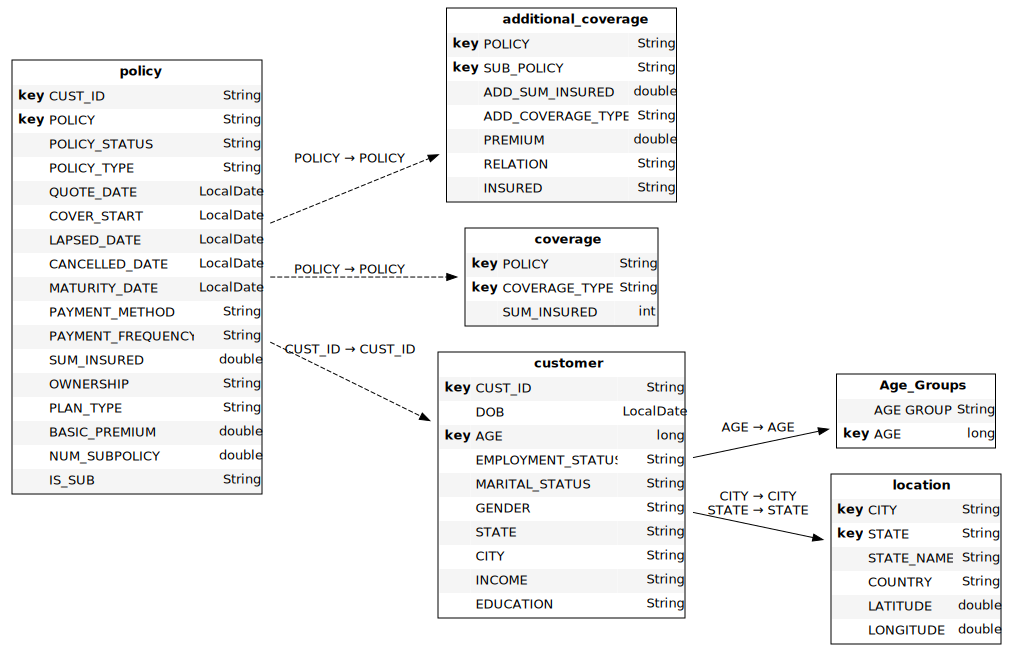

In [24]:
customer_tbl.join(age_groups_tbl)
customer_tbl.join(location_tbl)

cube.schema

### Adding policy claims

In our simplified use case, we will only look at the claims from vehicle policies.

In [25]:
claim_tbl = session.read_csv(
    "s3://data.atoti.io/notebooks/customer360/claims.csv",
    table_name="claim",
    keys=["POLICY", "CLAIM_DATE"],
)

policy_tbl.join(claim_tbl)

In [26]:
claim_tbl.head()

CLAIM_AMOUNT  CLAIM_REASON
POLICY  CLAIM_DATE                            
V000000 2013-07-24       4808.64     Collision
        2013-12-01       1246.21     Collision
        2014-12-15       4918.56     Collision
V000001 2013-02-25       1985.77  Scratch/Dent
        2014-02-21        163.97  Scratch/Dent

### Generating timeline for policy (with exclusion of Payment module)

Keeping the notebook simple, we will exclude the payment module. However, we should still be able to perform some simple analytics to look at the increase in premiums due to newly added policies; or the decrease due to the cancellation, lapsed or maturity of existing policies.  

To do this, we create a timeline for the policies, covering the cover start date, lapsed date, cancelled date and maturity date. We will not include renewal in this use case.  
Feel free to expand on the use case.

In [27]:
timeline_tbl = session.read_csv(
    "s3://data.atoti.io/notebooks/customer360/timeline.csv",
    table_name="timeline",
    keys=["POLICY"],
)

In [28]:
policy_tbl.join(timeline_tbl)

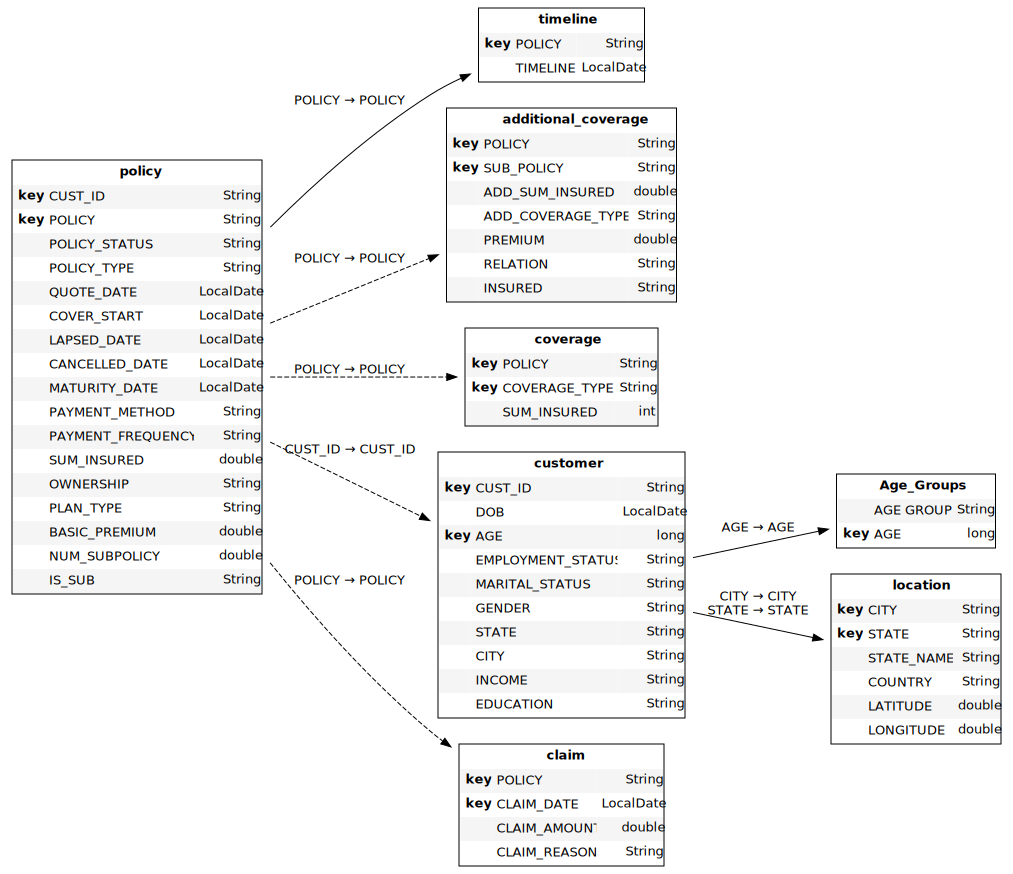

In [29]:
cube.schema

### Enabling aggregation sharing without caching

We can configure the [aggregation cache](https://docs.atoti.io/latest/lib/atoti.aggregates_cache.html#atoti.aggregates_cache.AggregatesCache.capacity) of the cube to share computation from queries if they are executed at the same time, with or without caching.

In [30]:
cube.aggregates_cache.capacity = 0

## Visualizing data in "as-is" state  

Based on what is loaded from the various data sources, we are able to start creating visuals without having to worry about the relationships between the table.  
Users will only need to know what are the hierarchies and measures that they want to explore.

In [31]:
session.visualize("Policy status by policy type")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

The above charts give the policy status across the entire timeline of our dataset. It may seem that vehicle policies have higher cancellation rate and property policies are more likely to lapse.  

Let's add timeline to our visualization to put things into perspective. But before that, we need to create some measures to perform some aggregation.

## Manipulating hierarchies and measures

The cube has the below attributes that we will use to create our measures.

In [32]:
h, l, m = cube.hierarchies, cube.levels, cube.measures

### Create date hierarchy on the timeline

We have the timeline for the various milestones of the policy. By creating a [date hierarchy](https://docs.atoti.io/latest/lib/atoti.experimental.html#atoti.experimental.create_date_hierarchy), we can view our measures on yearly, quarterly or monthly basis.

In [33]:
cube.create_date_hierarchy(
    "Time",
    column=timeline_tbl["TIMELINE"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MM"},
)

In [34]:
cube.create_date_hierarchy(
    "Cover start",
    column=policy_tbl["COVER_START"],
    levels={"Year": "yyyy", "Month": "MM"},
)

### Creating measures  

#### Resiliation rate

We compute the resiliance rate by taking the number of lapsed and cancelled policies against the total number of policies.

In [35]:
m["Number of lapsed policies"] = tt.agg.sum(
    tt.where(l["POLICY_STATUS"] == "Lapsed", m["contributors.COUNT"]),
    scope=tt.scope.origin(l["POLICY"]),
)

m["Number of cancelled policies"] = tt.agg.sum(
    tt.where(l["POLICY_STATUS"] == "Cancelled", m["contributors.COUNT"]),
    scope=tt.scope.origin(l["POLICY"], l["POLICY_TYPE"]),
)

m["Number of live policies"] = tt.agg.sum(
    tt.where(l["POLICY_STATUS"] == "Live", m["contributors.COUNT"]),
    scope=tt.scope.origin(l["POLICY"], l["POLICY_TYPE"]),
)

In [36]:
m["Resiliation rate"] = (
    m["Number of lapsed policies"] + m["Number of cancelled policies"]
) / m["contributors.COUNT"]
m["Resiliation rate"].formatter = "DOUBLE[#.00%]"

In [37]:
session.visualize("Resiliance rate of each policy type")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Putting the resiliation rate against the timeline hierarchy, we can see that property type policies are more likely to lapse than the other two policies based on the past 5 years performance. There is also an gradual increase in resiliation over the years.

In [38]:
session.visualize("Resiliation rate of each policy type for the past 5 years")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

#### Policy durations

We can compute measures for moving dates, such as the policy duration, months from inception etc from the current date.  
The current date is derived using the [Python function datetime](https://docs.python.org/3/library/datetime.html).  

We can apply conditions to compute the durations, putting the policy status into consideration:

In [39]:
m["Policy duration"] = tt.agg.mean(
    tt.where(
        l["POLICY_STATUS"] == "Lapsed",
        tt.date_diff(l["COVER_START"], l["LAPSED_DATE"], unit="years"),
        tt.where(
            l["POLICY_STATUS"] == "Cancelled",
            tt.date_diff(l["COVER_START"], l["CANCELLED_DATE"], unit="years"),
            tt.date_diff(l["COVER_START"], l["MATURITY_DATE"], unit="years"),
        ),
    ),
    scope=tt.scope.origin(l["COVER_START"], l["POLICY"]),
)

m["Months from inception"] = tt.agg.mean(
    tt.where(
        l["POLICY_STATUS"] == "Lapsed",
        tt.date_diff(l["COVER_START"], l["LAPSED_DATE"], unit="months"),
        tt.where(
            l["POLICY_STATUS"] == "Cancelled",
            tt.date_diff(l["COVER_START"], l["CANCELLED_DATE"], unit="months"),
            tt.date_diff(l["COVER_START"], datetime.today(), unit="months"),
        ),
    ),
    scope=tt.scope.origin(l["COVER_START"], l["POLICY"]),
)

m["Policy duration"].formatter = "DOUBLE[#]"
m["Months from inception"].formatter = "DOUBLE[#]"

#### No Claims Discount (NCD)

Based on the Policy plan type and the number of years without claims, discounts are given to the policy.  
We will load the discounts configuration for vehicle policies into the cube for computation of the final premiums.

In [40]:
ncd_tbl = session.read_csv(
    "s3://data.atoti.io/notebooks/customer360/ncd.csv",
    table_name="NCD",
    keys=["POLICY_TYPE", "PLAN", "NCD_YEARS"],
)

In [41]:
ncd_tbl.head()

,,,DISCOUNT
NCD_YEARS,POLICY_TYPE,PLAN,
1,Vehicle,Personal Basic,0.1
2,Vehicle,Personal Basic,0.2
3,Vehicle,Personal Basic,0.3
4,Vehicle,Personal Basic,0.4
5,Vehicle,Personal Basic,0.5


We can explicitly define the mapping between the tables.

In [42]:
policy_tbl.join(ncd_tbl, mapping={"PLAN_TYPE": "PLAN", "POLICY_TYPE": "POLICY_TYPE"})

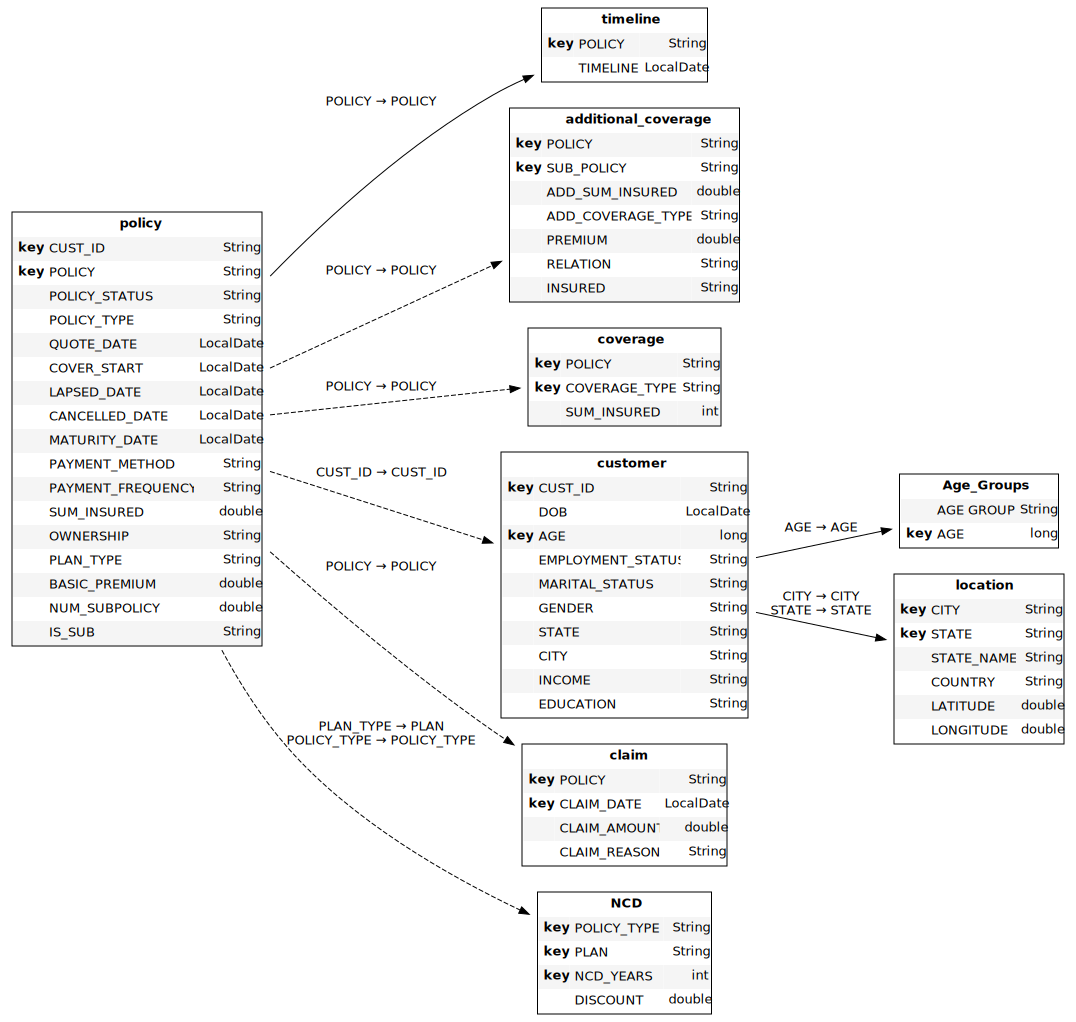

In [43]:
cube.schema

We will first compute the number of months since the last claim was made. Then we can derive the number of years without claims.  
Note that we are using the python function `datetime` to get the NCD with reference to the current date. Hence, the NCD is computed based on a moving date.

In [44]:
m["Months since claim"] = tt.date_diff(l["CLAIM_DATE"], datetime.today(), unit="months")
m["Last claim date"] = tt.agg.min_member(m["Months since claim"], l["CLAIM_DATE"])

m["Months since last claims"] = tt.date_diff(
    m["Last claim date"],
    datetime.today(),
    unit="months",
)

m["Policy NCD"] = tt.where(
    (m["Months since claim"] > 0) & (l["POLICY"] != None),
    tt.math.floor(m["Months since last claims"] / 12),
    tt.math.floor(m["Months from inception"] / 12),
)

We will take the most recent claim to compute the NCD period for the policy.

In [45]:
session.visualize("Period since last claims")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Note that there is a max number of years for the NCD. Beyond this number of years, the amount of discount given is the same.  
We will get the max NCD period for each of the policy plan.

In [46]:
m["NCD Years"] = tt.value(ncd_tbl["NCD_YEARS"], levels=[l["NCD_YEARS"], l["PLAN_TYPE"]])

m["Max NCD Year"] = tt.agg.mean(
    tt.agg.max(m["NCD Years"], scope=tt.scope.siblings(h["NCD_YEARS"])),
    scope=tt.scope.origin(l["PLAN_TYPE"], l["POLICY"]),
)

As the NCD discounts are in the referenced table, we will need to create a measure for it manually.

In [47]:
m["NCD Disounts"] = tt.agg.mean(ncd_tbl["DISCOUNT"])

We apply the discount depending on the number of NCD years the policy has. Otherwise, no discount is given.

In [48]:
m["Applied discount"] = tt.agg.mean(
    tt.where(
        (m["Policy NCD"] >= m["Max NCD Year"]) & (m["Max NCD Year"] == l["NCD_YEARS"])
        | (l["NCD_YEARS"] == m["Policy NCD"]),
        m["NCD Disounts"],
        0,
    ),
    scope=tt.scope.origin(l["NCD_YEARS"]),
)

m["Applied discount"].formatter = "DOUBLE[#.000%]"

We will aggregate the premiums after applying the discount. For all other insurances without NCD, we will take the value of the basic premium.

In [49]:
m["Discounted premium"] = tt.agg.sum(
    tt.agg.sum(
        tt.where(
            l["NCD_YEARS"] == 0,
            m["BASIC_PREMIUM.SUM"],
            tt.where(
                (m["Applied discount"] != 0),
                (1 - m["Applied discount"]) * m["BASIC_PREMIUM.SUM"],
            ),
        ),
        scope=tt.scope.origin(l["NCD_YEARS"]),
    ),
    scope=tt.scope.origin(l["POLICY"]),
)

In [50]:
session.visualize("Computation of premiums after NCD")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

#### Claims

In this use case, we only have the claim information for vehicle type policies.

In [51]:
m["Claim Amount"] = tt.agg.sum(
    tt.value(claim_tbl["CLAIM_AMOUNT"]), scope=tt.scope.origin(l["POLICY"])
)

In [52]:
session.visualize("Claim amount")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

#### Additional coverage measures

Before we compute the total premiums and sum assured for a customer, let's create the measure for the additional coverage.

In [53]:
m["Add. coverage premium"] = tt.agg.sum(addons_tbl["PREMIUM"])
m["Add. sum insured"] = tt.agg.sum(addons_tbl["ADD_SUM_INSURED"])

In [54]:
session.visualize("Additional coverage for customer C00035686")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

#### Computing the premium

We compute the total premium at the point of inception. This will give us some insight on the incoming premium based on the cover start date.  

Since payment frequency can be monthly, annually or 3 Yearly, we breakdown the premium to monthly denominator.

In [55]:
m["Total premium"] = m["BASIC_PREMIUM.SUM"] + m["Add. coverage premium"]

In [56]:
m["Initial total monthly premium"] = tt.agg.sum(
    tt.where(
        l["PAYMENT_FREQUENCY"] == "Annual",
        m["Total premium"] / 12,
        tt.where(
            l["PAYMENT_FREQUENCY"] == "3 Years",
            m["Total premium"] / 36,
            tt.where(l["PAYMENT_FREQUENCY"] == "Month", m["Total premium"]),
        ),
    ),
    scope=tt.scope.origin(l["PAYMENT_FREQUENCY"]),
)

From the below chart, we can see that amount of premium coming in from new policies (growth only).  
However, this value may change for various reasons, e.g.:
- Premium for Life insurance may increase 8% to 10% for every year of age;
- Premium of Vehicle insurance may decrease with NCD  

In [57]:
session.visualize("Monthly premium based on new policies cover start date")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Let's take into consideration the NCD discounts as of the current status of the premium to see how much has changed:

In [58]:
m["Total discounted premium"] = m["Discounted premium"] + m["Add. coverage premium"]

In [59]:
m["Current total monthly premium"] = tt.agg.sum(
    tt.where(
        l["PAYMENT_FREQUENCY"] == "Annual",
        m["Total discounted premium"] / 12,
        tt.where(
            l["PAYMENT_FREQUENCY"] == "3 Years",
            m["Total discounted premium"] / 36,
            tt.where(l["PAYMENT_FREQUENCY"] == "Month", m["Total discounted premium"]),
        ),
    ),
    scope=tt.scope.origin(l["PAYMENT_FREQUENCY"]),
)

In [60]:
m["Change in premium"] = (
    m["Initial total monthly premium"] - m["Current total monthly premium"]
)

In [61]:
session.visualize("Change in premium from inception till now")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Let's throw some timeline into perspective, considering when policies got cancelled, lapsed or matured.

In [62]:
m["Net Monthly Premium"] = tt.agg.sum(
    tt.where(
        l["TIMELINE"] == l["COVER_START"],
        m["Initial total monthly premium"],
        tt.where(
            ((l["TIMELINE"] == l["LAPSED_DATE"]) & (l["POLICY_STATUS"] == "Lapsed"))
            | (
                (l["TIMELINE"] == l["CANCELLED_DATE"])
                & (l["POLICY_STATUS"] == "Cancelled")
            )
            | ((l["TIMELINE"] == l["MATURITY_DATE"]) & (l["POLICY_STATUS"] == "Live")),
            -m["Initial total monthly premium"],
        ),
    ),
    scope=tt.scope.origin(l["TIMELINE"], l["POLICY"]),
)

There are always policies getting started, cancelled, lapsed or matured. If we look at the inflow and outflow of the policies, we can see that there are years where the premium of the outgoing policies exceed the amount of incoming policies.

In [63]:
session.visualize("Premium change due to cancellation, lapsed and maturity")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [64]:
m["Cumulative monthly premium"] = tt.agg.sum(
    m["Net Monthly Premium"],
    scope=tt.scope.cumulative(cube.levels[("timeline", "Time", "Month")]),
)

Through the cumulative premium, we can see the gradual decline in the amount of premiums collected up till 2021. From 2021, we can see the time to zero due to the maturity of the remainder of the existing policies. The company can come up with strategy to replace or renew the outgoing policies.

In [65]:
session.visualize("Monthly premium trend")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

## Exploring customer demographics  

We can look at the demographics of the customer by their age groups, income or location.

In [66]:
m["Customer count"] = tt.agg.count_distinct(customer_tbl["CUST_ID"])

In [67]:
session.visualize("Policy status by age group")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [68]:
session.visualize("Sum insured across Australia")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Toggling between measure and hierarchy

There are instances when a data column is useful as a hierarchy or as a measure. 

#### Hierarchy to measure - Age exploration

Let's look at `AGE` from the `Age_Groups` and `customer` tables for instance.  

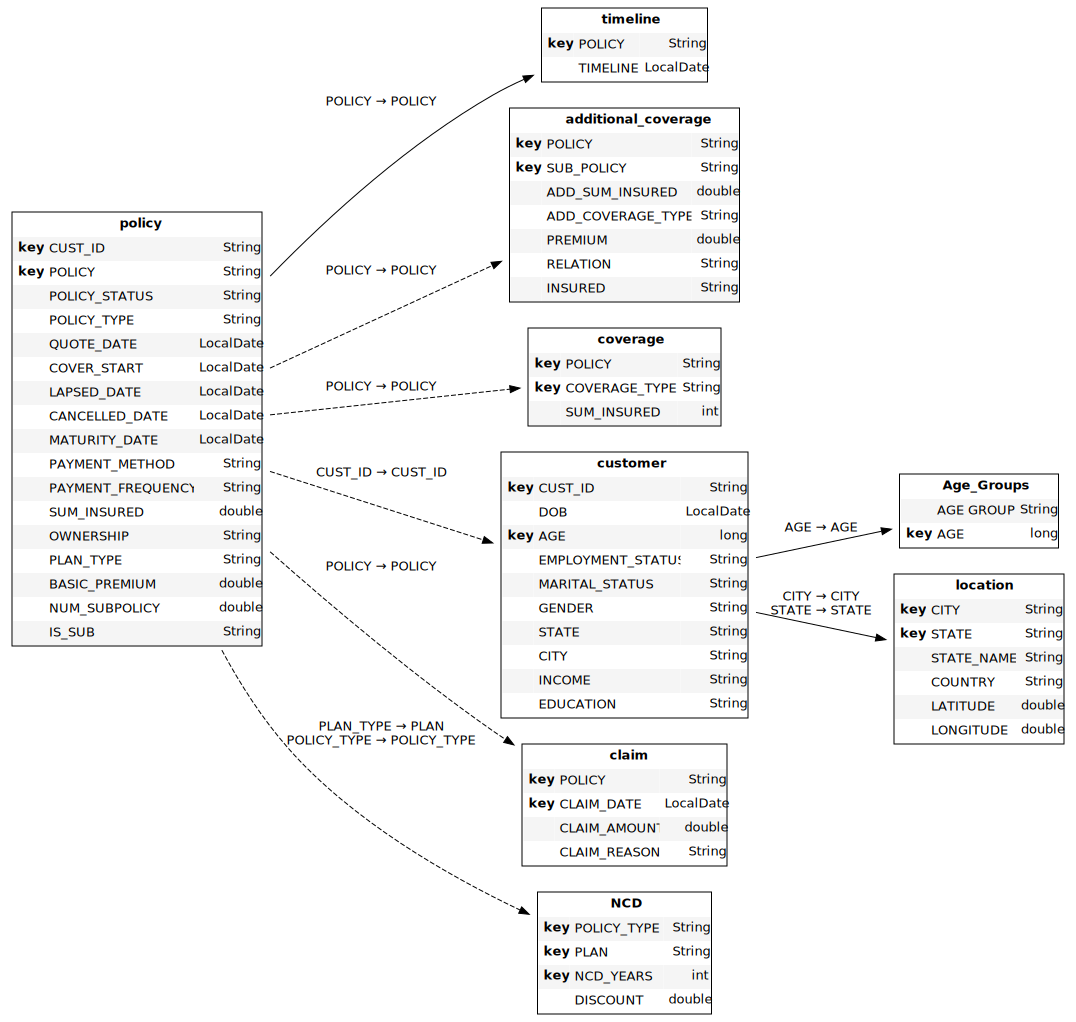

In [69]:
cube.schema


atoti automatically creates as a hierarchy since the `AGE` column is the key of a table.  
However, that doesn't stop us from using it as a measure. Simply create the measure by aggregating the column from the table.

In [70]:
m["age"] = tt.agg.mean(customer_tbl["AGE"])

We can see from the below chart, people from the 25-65 age range is more likely to cancel their policies and generally within the first 15 years from inception.

In [71]:
session.visualize("Duration of cancelled policy by age")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

It is also worthy to note that the age range has the most buying power and forms the majority of the policyholders.

In [72]:
session.visualize("No. of policies by age")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

#### Measure to Hierarchy - Additional coverage take up rate

Some insurance, such as the property policies, can have optional add-on coverages that contribute towards the final premium. 

In [73]:
h["No. sub policy"] = [policy_tbl["NUM_SUBPOLICY"]]

Close to 70% of the property type policies do not have add-on coverage while approximately 15% have either 1 or 2 add-ons.

In [74]:
session.visualize("Number of add-on coverage for property policies")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

## Dashboarding

In [75]:
session.link(path="/#/dashboard/03f")

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

Draw insights based on the customers' demographics or interactively select customers to see the details of their policies.

<img src="customer_360.gif" alt="Customer 360">

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=customer360" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/discover-try.png" alt="Try atoti"></a></div>